<a href="https://colab.research.google.com/github/riyabhatnagar021/Recognizing_a_fruit/blob/master/Fruit_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import zipfile
zer=zipfile.ZipFile('drive/My Drive/project_data/fruits.zip','r')
zer.extractall()
zer.close

<bound method ZipFile.close of <zipfile.ZipFile filename='drive/My Drive/project_data/fruits.zip' mode='r'>>

In [0]:
train='fruits-360/Training'
test='fruits-360/Test'

In [4]:
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
def load(path):
  data=load_files(path)
  filename=np.array(data['filenames'])
  target=np.array(data['target'])
  target_label=np.array(data['target_names'])
  return filename,target,target_label

x_train, y_train,target_labels = load(train)
x_test, y_test,_ = load(test)
  
  

In [6]:
# to calulate no of classes

no_of_classes=len(np.unique(y_train))
no_of_classes


114

In [0]:
y_train=to_categorical(y_train,no_of_classes)
y_test=to_categorical(y_test,no_of_classes)

In [0]:
x_train=x_train[17276:]

In [9]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

# x_valid = np.array(convert_image_to_array(x_valid))
# print('Validation set shape : ',x_valid.shape)

# x_test = np.array(convert_image_to_array(x_test))
# print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (40000, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [0]:
x_train=x_train/255

In [0]:
x_test = np.array(convert_image_to_array(x_test))

In [0]:
x_test=x_test/255

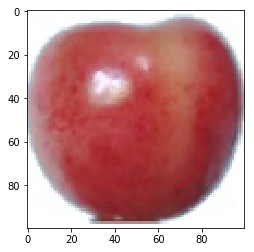

In [13]:
plt.imshow(x_train[20])

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D


In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[100,100,3]))
model.add(Dropout(0.2))

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(no_of_classes))
model.add(Activation('softmax'))

model.summary()

W0723 20:49:22.715672 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 20:49:22.760139 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 20:49:22.766765 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 20:49:22.794243 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 20:49:22.801925 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 96)        27744     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96, 96, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 884736)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 114)               100860018 
_________________________________________________________________
activation_1 (Activation)    (None, 114)               0         
Total para

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0723 20:49:30.044775 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 20:49:30.072685 140430903416704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
y_train=y_train[17276:]

In [18]:
x_train.shape

(40000, 100, 100, 3)

In [19]:
model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_test,y_test))

W0723 20:49:41.776857 140430903416704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 19548 samples
Epoch 1/10
40000/40000 [==============================] - 149s 4ms/step - loss: 0.7006 - acc: 0.9100 - val_loss: 0.2381 - val_acc: 0.9348
Epoch 2/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0371 - acc: 0.9898 - val_loss: 0.3425 - val_acc: 0.9267
Epoch 3/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0112 - acc: 0.9972 - val_loss: 0.3857 - val_acc: 0.9238
Epoch 4/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0196 - acc: 0.9946 - val_loss: 0.3133 - val_acc: 0.9424
Epoch 5/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0206 - acc: 0.9948 - val_loss: 0.4917 - val_acc: 0.9226
Epoch 6/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0159 - acc: 0.9969 - val_loss: 0.5421 - val_acc: 0.9254
Epoch 7/10
40000/40000 [==============================] - 140s 4ms/step - loss: 0.0233 - acc: 0.9955 - val_loss: 0.4897 - 

In [20]:
loss,acc=model.evaluate(x_test,y_test)
print('loss: ',loss)
print('accuracy: ',acc)

19548/19548 [==============================] - 15s 771us/step
loss:  0.552617135683276
accuracy:  0.9285860446081441


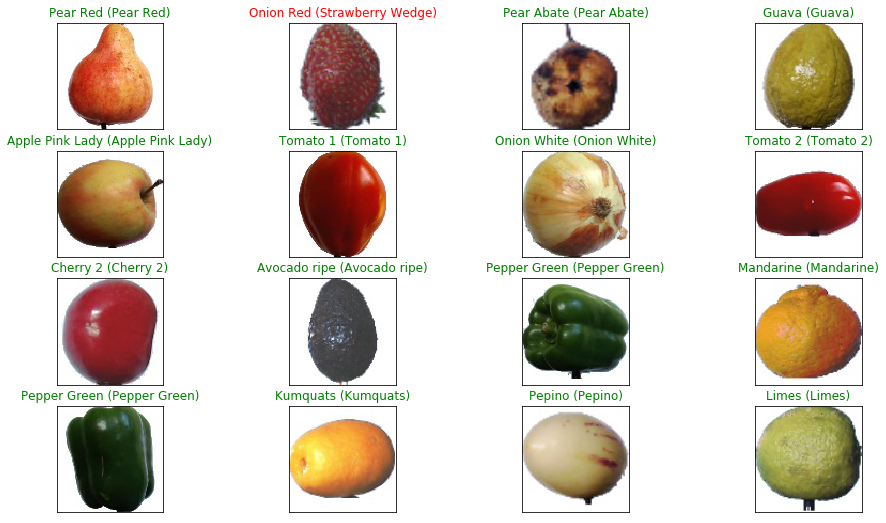

In [21]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
